In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_wwp = pd.read_csv('../data/HistoricalProductDemand.csv')

In [3]:
df_wwp.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Feature engineering and data clean up

In [4]:
df_wwp.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

Convert data to the appropriate types so as to not run into issues with models and visualization.

In [5]:
import re
def clean_order(string):
    return(re.sub("\D", "", string))

In [6]:
for i,row in df_wwp.iterrows():
    df_wwp.at[i, 'Order_Demand'] = clean_order(row['Order_Demand'])    

Some rows in the Order_Demand column had troublesome entries that we needed to clean up. Used to regex to remove all characters that are not digits

In [7]:
#Convert types
df_wwp['Date'] = pd.to_datetime(df_wwp['Date'])
df_wwp['Order_Demand'] = df_wwp['Order_Demand'].astype(int)

In [8]:
df_wwp.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int32
dtype: object

In [9]:
df_wwp.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


Let's create some extra features by extracting them from the date column

In [10]:
df_wwp['Year'] = df_wwp['Date'].dt.year
df_wwp['Month'] = df_wwp['Date'].dt.month
df_wwp['Day'] = df_wwp['Date'].dt.day
df_wwp['DayOfWeek'] = df_wwp['Date'].dt.dayofweek

In [11]:
df_wwp.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,DayOfWeek
0,Product_0993,Whse_J,Category_028,2012-07-27,100,2012.0,7.0,27.0,4.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500,2012.0,1.0,19.0,3.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500,2012.0,2.0,3.0,4.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500,2012.0,2.0,9.0,3.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2012.0,3.0,2.0,4.0


A new feature: shopping seasons as found online. We'll see if that actually helps.

In [12]:
#source: https://www.spscommerce.com/blog/shopping-seasons-consumer-spsa/
def shopping_season(month):
    if month in [1,2]:
        return 1
    elif month in [3,4,5]:
        return 2
    elif month in [6,7,8]:
        return 3
    elif month in [9,10]:
        return 4
    elif month in [11,12]:
        return 5

In [13]:
df_wwp.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int32
Year                       float64
Month                      float64
Day                        float64
DayOfWeek                  float64
dtype: object

In [14]:
df_wwp.isnull().values.any()

True

In [15]:
df_wwp[df_wwp.isnull().any(axis=1)].head(20)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,DayOfWeek
45460,Product_1461,Whse_A,Category_019,NaT,10000,NaN,NaN,NaN,NaN
456373,Product_1636,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN
456374,Product_1461,Whse_A,Category_019,NaT,300,NaN,NaN,NaN,NaN
456375,Product_1464,Whse_A,Category_019,NaT,300,NaN,NaN,NaN,NaN
456376,Product_1388,Whse_A,Category_019,NaT,200,NaN,NaN,NaN,NaN
456377,Product_1464,Whse_A,Category_019,NaT,600,NaN,NaN,NaN,NaN
456378,Product_1402,Whse_A,Category_019,NaT,600,NaN,NaN,NaN,NaN
456379,Product_1461,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN
456380,Product_1539,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN
456381,Product_1388,Whse_A,Category_019,NaT,800,NaN,NaN,NaN,NaN


In [16]:
import math
df_wwp['ShoppingSeason'] = df_wwp.apply(lambda row : shopping_season(row['Month']), axis=1)

In [17]:
df_wwp.head(20)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,DayOfWeek,ShoppingSeason
0,Product_0993,Whse_J,Category_028,2012-07-27,100,2012.0,7.0,27.0,4.0,3.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500,2012.0,1.0,19.0,3.0,1.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500,2012.0,2.0,3.0,4.0,1.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500,2012.0,2.0,9.0,3.0,1.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2012.0,3.0,2.0,4.0,2.0
5,Product_0979,Whse_J,Category_028,2012-04-19,500,2012.0,4.0,19.0,3.0,2.0
6,Product_0979,Whse_J,Category_028,2012-06-05,500,2012.0,6.0,5.0,1.0,3.0
7,Product_0979,Whse_J,Category_028,2012-06-27,500,2012.0,6.0,27.0,2.0,3.0
8,Product_0979,Whse_J,Category_028,2012-07-23,500,2012.0,7.0,23.0,0.0,3.0
9,Product_0979,Whse_J,Category_028,2012-08-29,500,2012.0,8.0,29.0,2.0,3.0


In [18]:
df_wwp[df_wwp.isnull().any(axis=1)].head(20)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,DayOfWeek,ShoppingSeason
45460,Product_1461,Whse_A,Category_019,NaT,10000,NaN,NaN,NaN,NaN,NaN
456373,Product_1636,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN,NaN
456374,Product_1461,Whse_A,Category_019,NaT,300,NaN,NaN,NaN,NaN,NaN
456375,Product_1464,Whse_A,Category_019,NaT,300,NaN,NaN,NaN,NaN,NaN
456376,Product_1388,Whse_A,Category_019,NaT,200,NaN,NaN,NaN,NaN,NaN
456377,Product_1464,Whse_A,Category_019,NaT,600,NaN,NaN,NaN,NaN,NaN
456378,Product_1402,Whse_A,Category_019,NaT,600,NaN,NaN,NaN,NaN,NaN
456379,Product_1461,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN,NaN
456380,Product_1539,Whse_A,Category_019,NaT,100,NaN,NaN,NaN,NaN,NaN
456381,Product_1388,Whse_A,Category_019,NaT,800,NaN,NaN,NaN,NaN,NaN


We can see that we have plenty of plenty NaN values in our data set. This might be troublesome when running our models. We can try missing value replacement but the data missing here is from the date; can't really replace date values with means for example like you would with other types quantitative data so we'll just leave it the way it is.

# Visualization

Next let's look at some visualizations to see if they help us understand the data a little better

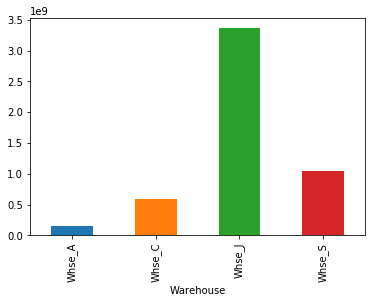

In [19]:
df_wwp.groupby('Warehouse')['Order_Demand'].sum().plot(kind='bar')

We can see that Whse_J ships out the most orders

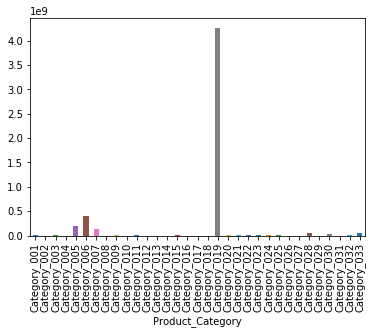

In [20]:
df_wwp.groupby('Product_Category')['Order_Demand'].sum().plot(kind='bar')

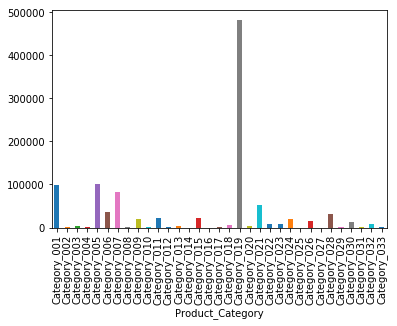

In [21]:
df_wwp.groupby('Product_Category')['Order_Demand'].count().plot(kind='bar')

We can see that Category_19 is the highest category in demand by far. The trend in the number of orders does not differ much from the trend in the amount of demand

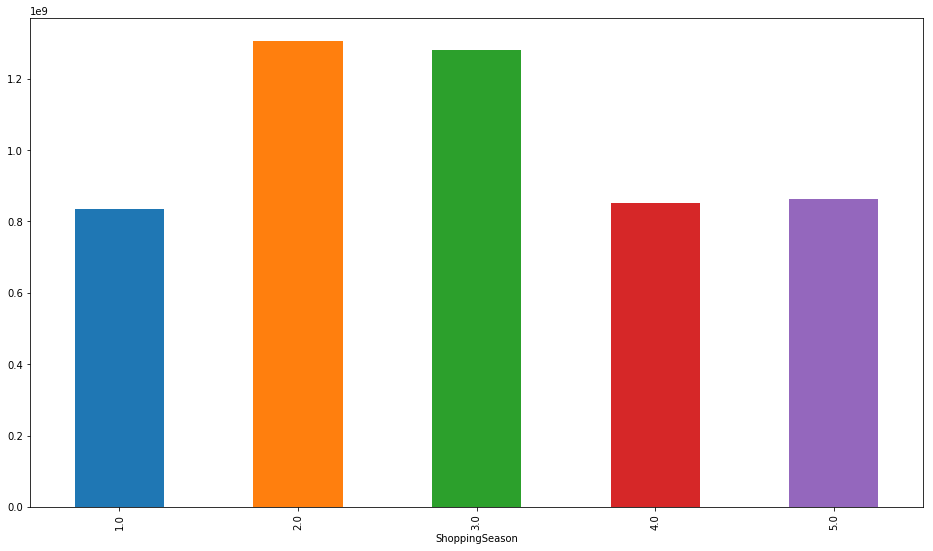

In [22]:
df_wwp.groupby('ShoppingSeason')['Order_Demand'].sum().plot(kind='bar', figsize=(16,9))

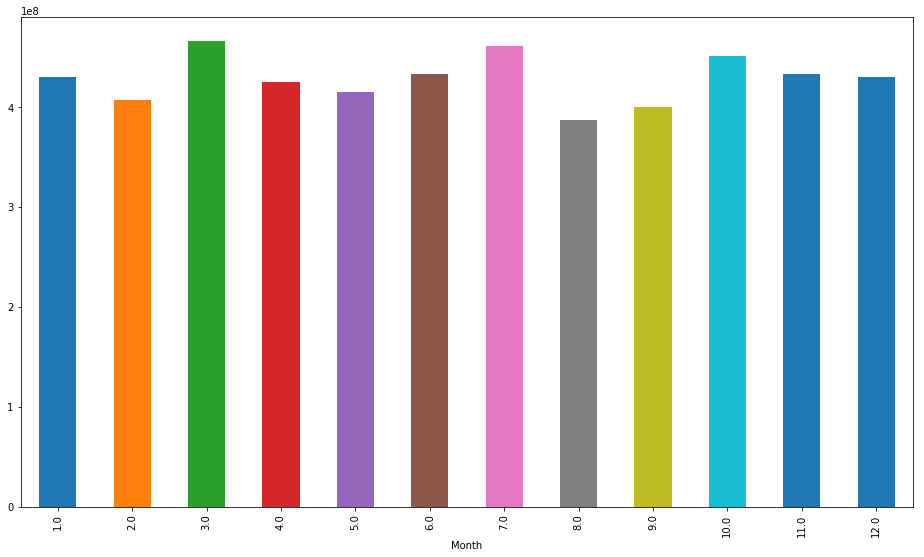

In [23]:
df_wwp.groupby('Month')['Order_Demand'].sum().plot(kind='bar', figsize=(16,9))

Without a lot of complex math or models, we can see that the categorization of shopping seasons we used isn't very useful because it is not at all indicative of the actual trends in shopping. The only reason behind the differences in demands between seasons is the fact that season 2 and 3 have three months grouped in them as opposed to only two.

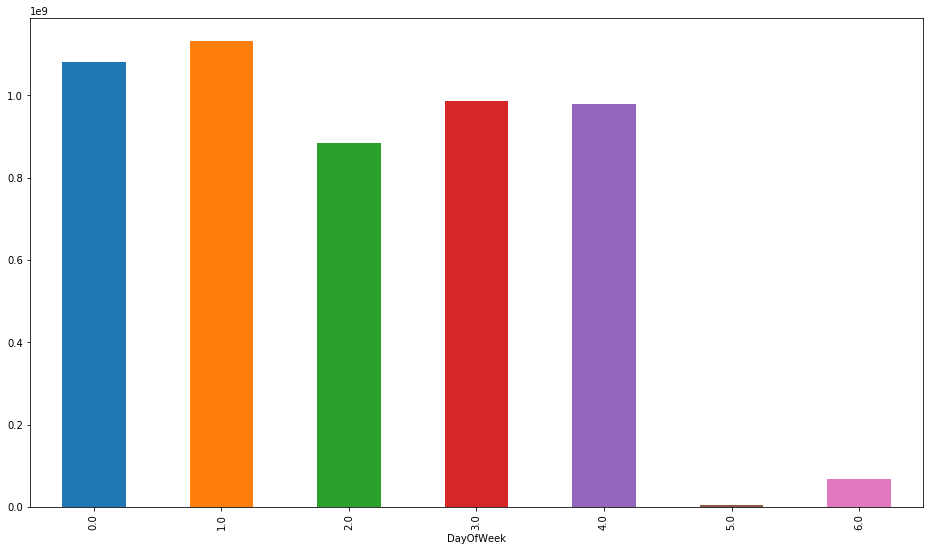

In [24]:
df_wwp.groupby('DayOfWeek')['Order_Demand'].sum().plot(kind='bar', figsize=(16,9))

We can see that demand over weekends is very low in comparison to the week days

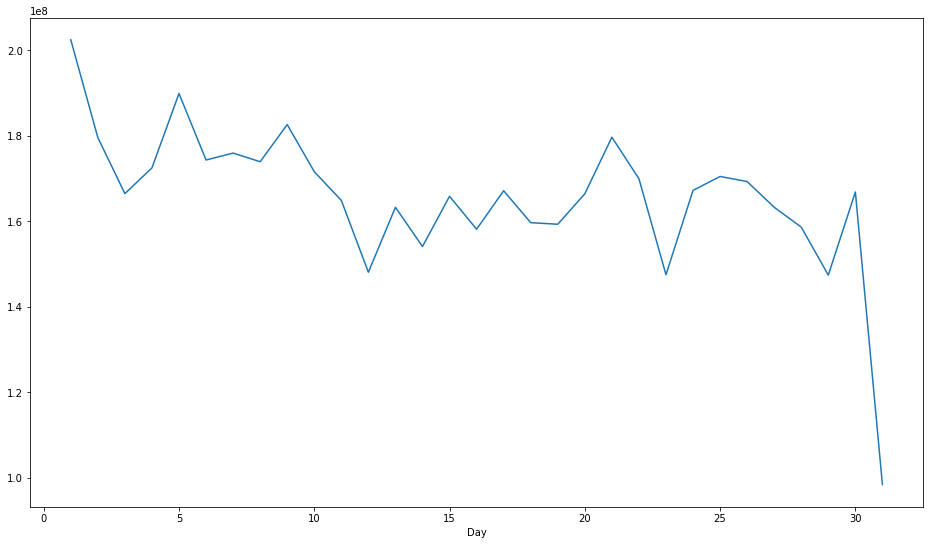

In [25]:
df_wwp.groupby('Day')['Order_Demand'].sum().plot(figsize=(16,9))

Not a lot of trends here except that you can see the cyclical nature of the orders over a week, and that orders are always the highest the first day of the month

# Models

In [26]:
from sklearn.preprocessing import LabelEncoder
#encode values of timeofday for use in models
le = LabelEncoder()
df_wwp['Product_Code'] = le.fit_transform(df_wwp['Product_Code'])
df_wwp['Warehouse'] = le.fit_transform(df_wwp['Warehouse'])  
df_wwp['Product_Category'] = le.fit_transform(df_wwp['Product_Category'])
# df_wwp['Year'] = le.fit_transform(df_wwp['Year'])
# df_wwp['Month'] = le.fit_transform(df_wwp['Month'])
# df_wwp['Day'] = le.fit_transform(df_wwp['Day'])
# df_wwp['DayOfWeek'] = le.fit_transform(df_wwp['DayOfWeek'])
# df_wwp['ShoppingSeason'] = le.fit_transform(df_wwp['ShoppingSeason'])

In [27]:
df_wwp[df_wwp.isnull().any(axis=1)].count()

Product_Code        11239
Warehouse           11239
Product_Category    11239
Date                    0
Order_Demand        11239
Year                    0
Month                   0
Day                     0
DayOfWeek               0
ShoppingSeason          0
dtype: int64

In [28]:
df_wwp = df_wwp.dropna()

In [29]:
df_wwp.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,DayOfWeek,ShoppingSeason
0,982,2,27,2012-07-27,100,2012.0,7.0,27.0,4.0,3.0
1,968,2,27,2012-01-19,500,2012.0,1.0,19.0,3.0,1.0
2,968,2,27,2012-02-03,500,2012.0,2.0,3.0,4.0,1.0
3,968,2,27,2012-02-09,500,2012.0,2.0,9.0,3.0,1.0
4,968,2,27,2012-03-02,500,2012.0,3.0,2.0,4.0,2.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


X = df_wwp[['Product_Code', 'Warehouse', 'Product_Category', 'Year','Month','Day','DayOfWeek']]
y = df_wwp['Order_Demand']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)
RandomForest = RandomForestRegressor()  
RandomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
RandomForest.feature_importances_

array([0.28550687, 0.06266246, 0.00209736, 0.10890577, 0.17003241,
       0.23360069, 0.13719443])

In [32]:
y_pred = RandomForest.predict(X_test)
df_randomforest =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

In [33]:
df_randomforest.head(20)

,Actual,Predicted
301539,10,30.283333
352200,1000,882.500000
379744,500,180.000000
187340,20,55.100000
154081,100,728.333333
70932,900,905.000000
752701,250,370.000000
228593,10000,2150.000000
62348,1000,1600.000000
428453,20000,13500.000000


In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 5268.371944826979
Mean Squared Error: 721862523.1027669
Root Mean Squared Error: 26867.499383135135


As we can see, the prediction for the amount ordered is abysmal

In [36]:
DT = DecisionTreeRegressor()  
DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
print(DT.feature_importances_)
y_pred = DT.predict(X_test)
df_pred =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

[0.30975099 0.07392118 0.0026536  0.10774021 0.15395662 0.22289205
 0.12908535]


In [38]:
df_pred.head(20)

,Actual,Predicted
301539,10,27.000000
352200,1000,800.000000
379744,500,100.000000
187340,20,40.000000
154081,100,1000.000000
70932,900,600.000000
752701,250,50.000000
228593,10000,2000.000000
62348,1000,1000.000000
428453,20000,22500.000000


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5658.094087629469
Mean Squared Error: 1008713277.449224
Root Mean Squared Error: 31760.246810269342


In [40]:
GB = GradientBoostingRegressor()  
GB.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [41]:
print(GB.feature_importances_)
y_pred = GB.predict(X_test)
df_pred =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

[6.94951042e-01 1.47718166e-01 9.13340769e-02 1.08266300e-02
 6.00667172e-04 1.07826080e-03 5.34911573e-02]


In [43]:
df_pred.head(20)

,Actual,Predicted
301539,10,1296.741614
352200,1000,5825.697994
379744,500,5516.647900
187340,20,3290.657214
154081,100,5562.310877
70932,900,2802.788815
752701,250,4578.387203
228593,10000,3180.290868
62348,1000,4141.888611
428453,20000,16498.682670


In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5618.233984329525
Mean Squared Error: 624061707.7268429
Root Mean Squared Error: 24981.227106105955


As we can see that with all three of our regressors we predicted values with an error of about +-5000 on the order demand. Not great. This is possibly because the Order_Demand values range from extremely small to very large so this variance can cause the regressor to generate large errors.

In [ ]:
print("Random Forest Regressor R^2:", reg.score(X_test, y_test))
print("Gradient Boosting R^2:", boost.score(test, test_labels))
print("Ada Boosting R^2:", ada.score(test, test_labels))